# 3D interpolation of distance modulus

In [135]:
import sys
sys.path.append("../../")
from pyACC.cosmology import Dc

import math as m
import numpy as np
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt
from scipy.misc import derivative

**Distance modulus**

In [136]:
OmegaM=0.319
OmegaR=0
w=-1
H0=67

def hubble_function(z,OmegaM,OmegaR,w,H0):
    return H0*m.sqrt(OmegaM*(1+z)**3+OmegaR*(1+z)**4+(1-OmegaM-OmegaR)*(1+z)**(3*(1+w)))

d=0.1
z=np.arange(0,2,d)+d

comoving_distance=[]
for i in range(0,len(z)):
    comoving_distance.append(Dc(hubble_function,z[i],OmegaM,OmegaR,w,H0))

luminosity_distance=[]
for i in range(0,len(z)):
    luminosity_distance.append(comoving_distance[i]*(1+z[i]))

distance_modulus=[]
for i in range(0,len(z)):
    distance_modulus.append(5*m.log10(luminosity_distance[i]*10**5))

**Interpolation**

In [137]:
interpolate=interp1d(z,distance_modulus,kind='linear')

d_int=0.01
z_int=np.arange(0+d,2,d_int)+d_int
distance_modulus_int=interpolate(z_int)

## Residual
$\Delta (dist\_mod)=(dist\_mod)^{int}-(dist\_mod)^t$

**Theoretical distance modulus**

In [138]:
comoving_distance_t=[]
for i in range(0,len(z_int)):
    comoving_distance_t.append(Dc(hubble_function,z_int[i],OmegaM,OmegaR,w,H0))

luminosity_distance_t=[]
for i in range(0,len(z_int)):
    luminosity_distance_t.append(comoving_distance_t[i]*(1+z_int[i]))

distance_modulus_t=[]
for i in range(0,len(z_int)):
    distance_modulus_t.append(5*m.log10(luminosity_distance_t[i]*10**5))

**Residual**

In [139]:
Delta_dist=[]
for i in range(0,len(z_int)):
    Delta_dist.append(distance_modulus_t[i]-distance_modulus_int[i])
    #print(Delta_dist[i])

**Second derivative**

In [140]:
der_distance_modulus=[]
for i in range(0,len(z_int)):
    #distance modulus function
    def distance_modulus_func(z):
        #z=max(z,1e-6)
        return 5*m.log10(Dc(hubble_function,z,OmegaM,OmegaR,w,H0)*(1+z)*10**5)
    der_distance_modulus.append(abs(derivative(distance_modulus_func,z_int[i],dx=1e-6,n=2)))
der_distance_modulus_mod=[]
for i in range(0,len(z_int)):
    der_distance_modulus_mod.append(abs(der_distance_modulus[i])*d*d/8)

/var/folders/zj/ynn451w51tl8mfxzn0g716qr0000gn/T/ipykernel_14265/1615252680.py:7: DeprecationWarning: scipy.misc.derivative is deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. You may consider using findiff: https://github.com/maroba/findiff or numdifftools: https://github.com/pbrod/numdifftools
  der_distance_modulus.append(abs(derivative(distance_modulus_func,z_int[i],dx=1e-6,n=2)))


## Plot

**Linear interpolation**

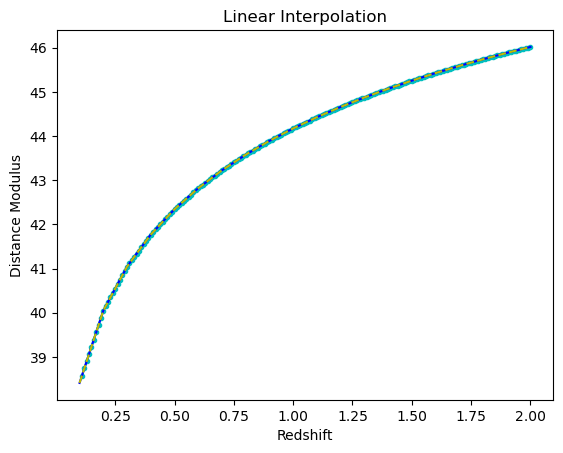

In [141]:
plt.plot(z_int,distance_modulus_int,color='c',marker='.')
plt.plot(z,distance_modulus,color='b',marker=',')
plt.plot(z,interpolate(z),color='y',linestyle='--')
plt.xlabel('Redshift')
plt.ylabel('Distance Modulus')
plt.title('Linear Interpolation')
plt.show()

**Residual**

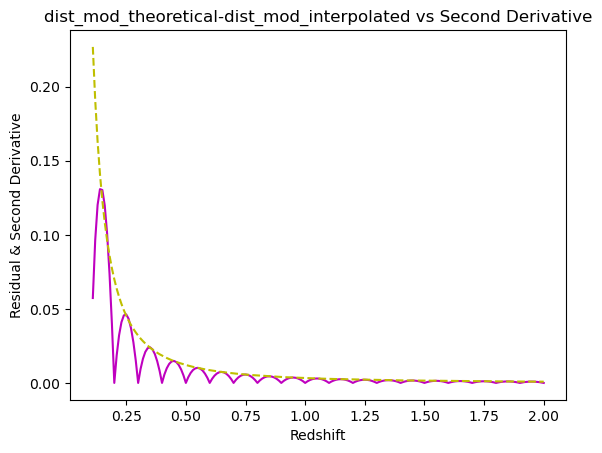

In [142]:
plt.plot(z_int,Delta_dist,color='m',linestyle='-')
plt.plot(z_int,der_distance_modulus_mod,color='y',linestyle='--')
plt.xlabel('Redshift')
plt.ylabel('Residual & Second Derivative')
plt.title('dist_mod_theoretical-dist_mod_interpolated vs Second Derivative')
plt.show()